# DOM

In [92]:
# getDownload
import requests

headers = {'user-agent' :'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36'}

def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>파이썬 - Google 검색</title><script nonce="veFni3GD1WZ6hG+StyNpTw==">(function(){window.google={kEI:\'lfWFXLXWKs2JoATyw4jADQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_lfWFXLXWKs2JoATyw4jADQ\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=goo
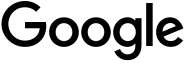
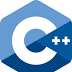

In [93]:
html = getDownload("http://www.google.com/search",{"q":"파이썬"})
html.text

# BeautifulSoup

In [94]:
!pip install beautifulsoup4

In [95]:
from bs4 import BeautifulSoup

In [96]:
# / ( 슬래쉬 )는 닫는 태그이다. 

In [97]:
html = """
<html>
        <head></head>
        <body>
                <div id='result'>
                        <p class='row'>
                                <a class = 'red'> Go to page1</a>
                                <a class = 'blue'> Go to page2</a>
                        </p>
                </div>
        </body>
</html>
""" 

dom = BeautifulSoup(html,'lxml') ## markup , parser 


In [98]:
type(html) ,type(dom)

(str, bs4.BeautifulSoup)

In [99]:
dom.html.head.name
dom.html.head.attr

In [100]:
type(dom.html),type(dom.html.head)
# tag -> name, attribute

(bs4.element.Tag, bs4.element.Tag)

In [101]:
print(dom.text)

# = dom.html.body.p.a.text 인것 ( 정석으로는 )
# 원래 내가 web에서 보는 글자. 






 Go to page1
 Go to page2







In [102]:
dom.a # 실질적으로는 이렇게 가져옴  ( dom 뒤에 붙이기만 하면 됨 )
dom.a.text # 그 때의 내용이 무엇이었는가

' Go to page1'

In [103]:
whos # memory 보는 것

No variables match your requested type.


In [104]:
dom.a['class']

['red']

In [105]:
# 없는 태그를 찾아도 오류가 나지 않음 ( 다만 type이 Nontype )
dom.h1 

In [106]:
# text부터는 에러 발생 ( 없으니까! )
print(dom.h1.text)

AttributeError: 'NoneType' object has no attribute 'text'

In [107]:
# 에러 확인

try:
    print(dom.h1.text)
except AttributeError as e:
    print(type(dom.h1))
    print("Not found")
    

<class 'NoneType'>
Not found


In [108]:
import bs4
bs4.element.Tag == dom.Elements

False

In [109]:
dom.a, dom.find('a') # A 태그가 2개 였음

(<a class="red"> Go to page1</a>, <a class="red"> Go to page1</a>)

In [110]:
print(dom.find_all('a'))
len(dom.find_all('a'))

[<a class="red"> Go to page1</a>, <a class="blue"> Go to page2</a>]


2

In [111]:
for tag in dom.find_all('a'):  # limit를 줘서 수 제한을 둘 수 있다. 
    print(tag.name, tag['class'], tag.text)

a ['red']  Go to page1
a ['blue']  Go to page2


In [112]:
dom.find_all('a',{'class':'red'}) # list 객체로 반환함

[<a class="red"> Go to page1</a>]

In [113]:
len(dom.find_all({'div','p'}))      # dict의 key를 넣어줌 

for tag in dom.find_all({'div','p'}):  # 동시에 여러 태그를 찾을 때 쓰임 
    print(tag.name,  tag.text)

div 

 Go to page1
 Go to page2


p 
 Go to page1
 Go to page2



In [114]:
# 내용으로 찾기 

dom.find_all(text='Go to page1')

[]

In [115]:
dom.find_all('div',recursive=True)

[<div id="result">
 <p class="row">
 <a class="red"> Go to page1</a>
 <a class="blue"> Go to page2</a>
 </p>
 </div>]

In [116]:
# http://pythonscraping.com/pages/page3.html

In [121]:
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'}


def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

In [122]:
url = 'http://pythonscraping.com/pages/page3.html'
html = getDownload(url)
dom = BeautifulSoup(html.content,'lxml')   # text나 content(byte)
#dom = BeautifulSoup(html.content,'html.parser')  # 파서마다 능력이 다름, footer보다 /html 이 먼저 닫힘 
# 다른데서는 장점으로 발휘될 수 있음. / 잘 되는 parser를 찾아야함.
footer = dom.find('div', {'id':'footer'})
footer

<div id="footer">
© Totally Normal Gifts, Inc. <br/>
+234 (617) 863-0736
</div>

In [123]:
parent = footer.find_parent()
parent.name, parent.attrs
dom

<html>
<head>
<style>
img{
	width:75px;
}
table{
	width:50%;
}
td{
	margin:10px;
	padding:10px;
}
.wrapper{
	width:800px;
}
.excitingNote{
	font-style:italic;
	font-weight:bold;
}
</style>
</head>
<body>
<div id="wrapper">
<img src="../img/gifts/logo.jpg" style="float:left;"/>
<h1>Totally Normal Gifts</h1>
<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is
hand-curated by well-paid, free-range Tibetan monks.<p>
We haven't figured out how to make online shopping carts yet, but you can send us a check to:<br/>
123 Main St.<br/>
Abuja, Nigeria
We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</p></div>
<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) frien

In [ ]:
parent = footer.find_parent()
parents = footer.find_parents() # 뒤에 s가 붙은 애들은 다 찾는 것 !

for row in parents:
    print(row.name,row.attrs)
    
children = parent.find_all(recursive=False) # 이 노드로 부터 모든 자식노드를 가져온다. 

for row in children:
    print(row.name,row.attrs)

# 그 아래 모든 자식노드들+ 자손노드를 불러옴 ( 디폴트값 : recursive = True) : 깊이 우선 탐색 ( 자손 )
#  recursive=False로 해야 "바로 아래 자식노드"만 불러옴 

In [ ]:
# 자손노드 찾기
decendents = parent.find_all()     # recursive T/F 의 차이

# for row in decendents:
#     print(row.name,row.attrs)

divchildren = children[2].find_all(recursive=False)   # 자식으로부터 자손찾기
for row in divchildren :
    print(row.name,row.attrs,row.text)

In [ ]:
# 형제노드 찾기
divTag = children[2]
children[1].name, divTag.find_previous_sibling().name
children[1] == divTag.find_previous_sibling()    # value 까지 다 체크
children[3] == divTag.find_next_sibling() 
divTag.find_next_siblings()  # 모든 형제 노드를 찾을 수 있음

# 가격 5개 가져오기

In [ ]:
for tag in dom.find_all('',{'class':'gift'}):
    print(tag.find_all(recursive=False)[2].text.strip())


# Google 검색내용 찾기

In [ ]:
html = getDownload("http://www.google.com/search",{"q":"파이썬"}) # html자체는 response라서 text를 넘겨줘야함 
dom = BeautifulSoup(html.text,'lxml')
for tag in dom.find_all('',{'class':'r'}):
    print(tag.find(recursive=False).text)
    
    
# h3는 이용하면 안됨

# NAVER 검색내용 찾기

In [134]:
html = getDownload('https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC')
dom = BeautifulSoup(html.text,'lxml')


for tag in  dom.find_all('',{'class':'sh_blog_title _sp_each_url _sp_each_title'}):
    print(tag.text)


파이썬 기초 공부 방법 - 입문하는 초보들에게
파이썬으로 디스코드 봇 만들기
[수학으로 배우는 파이썬] 다나카 카즈나리 저 / 유세라 역
파이썬 웹구축부터 머신러닝까지 다재다능한 코딩언어!
삼성이 챙기는 파이썬


# Nate

In [129]:
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537'}


def getDownload(url, param = None, retries = 3):
    resp = None
    try:
        resp = requests.get(url, params = param, headers = headers)
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= resp.status_code < 600 and retries > 0:
            print('Retries : {0}'.format(retries))
            return getDownload(url, param, retries -1)
        else:
            print(resp.status_code)
            print(resp.reason)
            print(resp.request.headers)
            
    return resp

In [132]:
url = "https://search.daum.net/nate"
param = {
        "thr":"sbma",
         "w":"tot",
         "q":"파이썬"}

html = getDownload(url,param)
dom = BeautifulSoup(html.content,"lxml")
html.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="mac chrome ">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n\n<meta name="referrer" content="always">\n\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="파이썬 &ndash; 네이트 검색" />\n<meta property="og:url" content="https://search.daum.net/nate?w=tot&q=%ED%8C%8C%EC%9D%B4%EC%8D%AC" />\n<meta property="og:description" content="네이트 검색에서 파이썬에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://m1.daumcdn.net/svc/image/U03/common_icon/5588F6B70245C20001">\n<meta property="og:site_name" content="다음검색" />\n<title>파이썬 &ndash; 네이트 검색</title>\n<link href="//www.nate.com/favicon.ico" type="image/x-icon" rel="shortcut icon">\n<link rel="search" ty

In [133]:
blog = dom.find("",{"id":"blogColl"})
blog
for tag in blog.find_all("a",{"class":"f_link_b"}):
    print(tag.text)

파이썬(Python)에 대해서 알아보자!
1. 파이썬 개발 도구 설치
[파이썬] 2. 소프트웨어 - 파이썬 시작하기
1. 파이썬 설치 및 개발환경 설정
